In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
emissions = pd.read_csv("ghg-emissions-by-sector-stacked.csv")

In [3]:
emissions.head()

,Entity,Code,Year,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat
0,Afghanistan,AFG,1990,0.0,20000.0,1230000.0,129999.99,50000.0,280000.0,8069999.5,570000.0,980000.0,320000.0
1,Afghanistan,AFG,1991,0.0,20000.0,1320000.0,140000.00,60000.0,240000.0,8390000.0,530000.0,930000.0,300000.0
2,Afghanistan,AFG,1992,0.0,20000.0,1400000.0,150000.00,60000.0,200000.0,8400000.0,390000.0,740000.0,200000.0
3,Afghanistan,AFG,1993,0.0,20000.0,1490000.0,160000.00,60000.0,160000.0,8480000.0,380000.0,740000.0,200000.0
4,Afghanistan,AFG,1994,0.0,20000.0,1580000.0,160000.00,60000.0,120000.0,8520000.0,360000.0,730000.0,190000.0


In [4]:
emissions.columns

Index(['Entity', 'Code', 'Year',
       'Greenhouse gas emissions from other fuel combustion',
       'Greenhouse gas emissions from bunker fuels',
       'Greenhouse gas emissions from waste',
       'Greenhouse gas emissions from buildings',
       'Greenhouse gas emissions from industry',
       'Fugitive emissions of greenhouse gases from energy production',
       'Greenhouse gas emissions from agriculture',
       'Greenhouse gas emissions from manufacturing and construction',
       'Greenhouse gas emissions from transport',
       'Greenhouse gas emissions from electricity and heat'],
      dtype='object')

In [5]:
sectors = [
    'Greenhouse gas emissions from other fuel combustion',
       'Greenhouse gas emissions from bunker fuels',
       'Greenhouse gas emissions from waste',
       'Greenhouse gas emissions from buildings',
       'Greenhouse gas emissions from industry',
       'Fugitive emissions of greenhouse gases from energy production',
       'Greenhouse gas emissions from agriculture',
       'Greenhouse gas emissions from manufacturing and construction',
       'Greenhouse gas emissions from transport',
       'Greenhouse gas emissions from electricity and heat'
]

global_emissions = emissions.groupby('Year')[sectors].sum()
global_emissions[sectors] = global_emissions[sectors]/1000000

global_emissions.head()

,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat
Year,,,,,,,,,,
1990,3157.610000,2619.880019,5621.510026,12090.419804,4013.619971,8591.240012,20412.180264,16489.629789,17573.029898,35781.738831
1991,3162.989950,2652.890000,5747.700050,12221.849928,4029.329923,8696.420044,20348.559897,16112.909970,17703.370172,36310.469741
1992,2819.270000,2793.219989,5842.110114,11731.249981,4268.990041,8698.880082,20241.910122,15516.740055,18027.020041,36899.359961
1993,2871.240019,2761.070010,5947.160025,12005.520080,4329.140096,8793.680032,20104.550053,15300.640177,18217.310070,37010.570459
1994,2753.910022,2858.449992,6052.970071,11613.999969,4776.510029,8826.079806,20269.489969,15381.000260,18525.750311,37418.420049


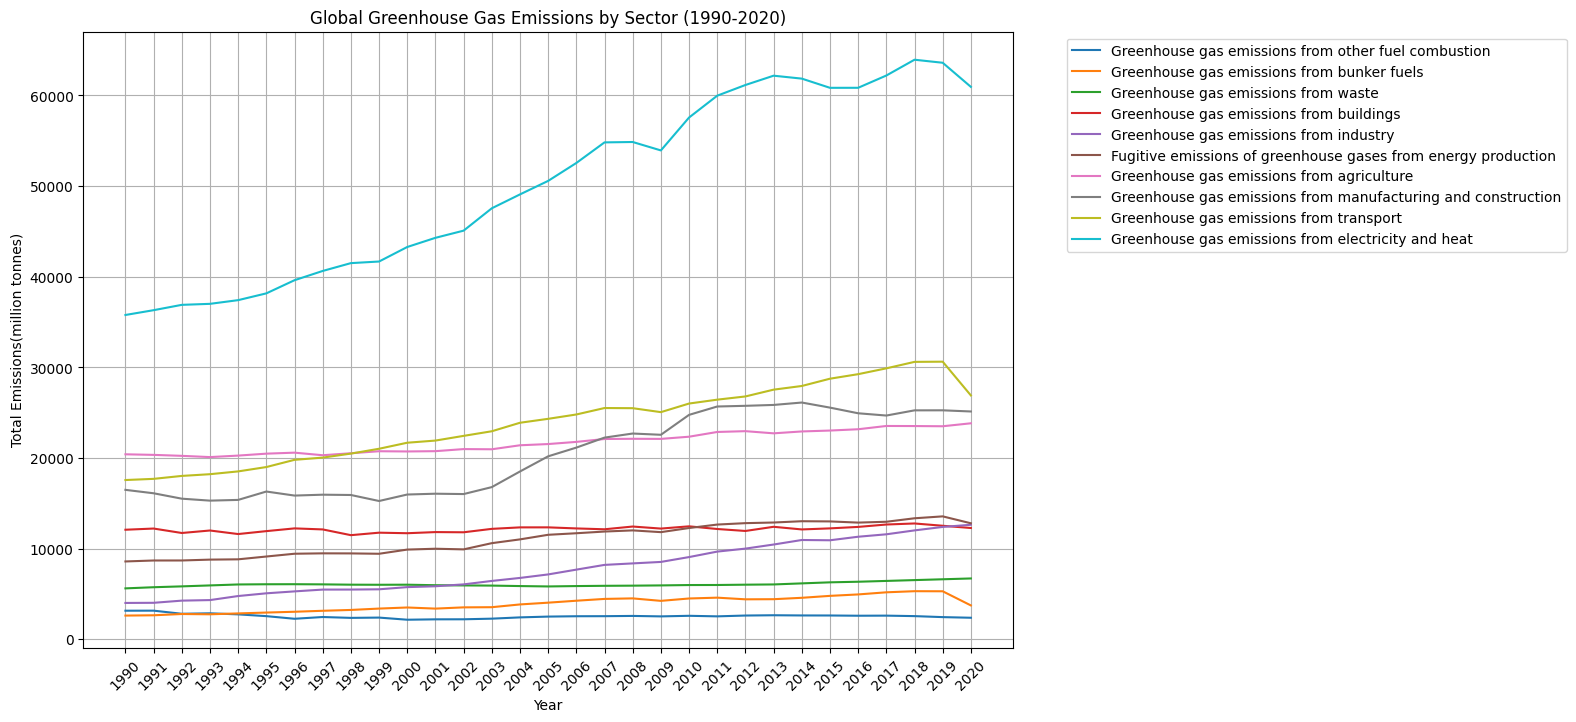

In [6]:
plt.figure(figsize=(12, 8))
for sector in sectors:
    plt.plot(global_emissions.index, global_emissions[sector], label=sector)

all_years = list(global_emissions.index)
plt.xticks(all_years, rotation=45)
plt.title('Global Greenhouse Gas Emissions by Sector (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Total Emissions(million tonnes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [7]:
for sector in sectors:
    global_emissions[f'{sector}_diff'] = global_emissions[sector].diff()

global_emissions = global_emissions.dropna()
global_emissions.head()

,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Greenhouse gas emissions from other fuel combustion_diff,Greenhouse gas emissions from bunker fuels_diff,Greenhouse gas emissions from waste_diff,Greenhouse gas emissions from buildings_diff,Greenhouse gas emissions from industry_diff,Fugitive emissions of greenhouse gases from energy production_diff,Greenhouse gas emissions from agriculture_diff,Greenhouse gas emissions from manufacturing and construction_diff,Greenhouse gas emissions from transport_diff,Greenhouse gas emissions from electricity and heat_diff
Year,,,,,,,,,,,,,,,,,,,,
1991,3162.989950,2652.890000,5747.700050,12221.849928,4029.329923,8696.420044,20348.559897,16112.909970,17703.370172,36310.469741,5.379950,33.009981,126.190025,131.430124,15.709952,105.180032,-63.620366,-376.719818,130.340274,528.730910
1992,2819.270000,2793.219989,5842.110114,11731.249981,4268.990041,8698.880082,20241.910122,15516.740055,18027.020041,36899.359961,-343.719950,140.329989,94.410064,-490.599947,239.660118,2.460038,-106.649776,-596.169916,323.649869,588.890219
1993,2871.240019,2761.070010,5947.160025,12005.520080,4329.140096,8793.680032,20104.550053,15300.640177,18217.310070,37010.570459,51.970019,-32.149979,105.049911,274.270099,60.150055,94.799950,-137.360069,-216.099877,190.290029,111.210498
1994,2753.910022,2858.449992,6052.970071,11613.999969,4776.510029,8826.079806,20269.489969,15381.000260,18525.750311,37418.420049,-117.329998,97.379982,105.810046,-391.520111,447.369934,32.399774,164.939916,80.360082,308.440241,407.849590
1995,2557.660083,2953.619976,6075.130023,11936.799885,5076.580010,9135.169809,20483.060147,16305.119989,19005.900260,38165.510302,-196.249939,95.169984,22.159952,322.799916,300.069981,309.090003,213.570178,924.119729,480.149949,747.090253


In [8]:
supervised_emissions = global_emissions.drop(sectors, axis=1)

In [9]:
supervised_emissions.head(10)

,Greenhouse gas emissions from other fuel combustion_diff,Greenhouse gas emissions from bunker fuels_diff,Greenhouse gas emissions from waste_diff,Greenhouse gas emissions from buildings_diff,Greenhouse gas emissions from industry_diff,Fugitive emissions of greenhouse gases from energy production_diff,Greenhouse gas emissions from agriculture_diff,Greenhouse gas emissions from manufacturing and construction_diff,Greenhouse gas emissions from transport_diff,Greenhouse gas emissions from electricity and heat_diff
Year,,,,,,,,,,
1991,5.379950,33.009981,126.190025,131.430124,15.709952,105.180032,-63.620366,-376.719818,130.340274,528.730910
1992,-343.719950,140.329989,94.410064,-490.599947,239.660118,2.460038,-106.649776,-596.169916,323.649869,588.890219
1993,51.970019,-32.149979,105.049911,274.270099,60.150055,94.799950,-137.360069,-216.099877,190.290029,111.210498
1994,-117.329998,97.379982,105.810046,-391.520111,447.369934,32.399774,164.939916,80.360082,308.440241,407.849590
1995,-196.249939,95.169984,22.159952,322.799916,300.069981,309.090003,213.570178,924.119729,480.149949,747.090253
1996,-289.720134,87.799950,6.069937,301.880019,212.519839,307.550429,110.429675,-445.939948,796.349120,1451.159622
1997,193.720028,107.840070,-18.040082,-114.349908,198.840066,43.389782,-284.039942,96.989909,243.850441,1021.940200
1998,-94.659939,92.700009,-34.219759,-633.270051,3.109885,-7.130050,218.339921,-32.740040,443.249969,863.589932
1999,31.369941,150.589941,-9.830231,274.320132,28.190170,-39.770037,222.490286,-663.419830,533.970152,177.099628


In [10]:
supervised_emissions = supervised_emissions.reset_index()
for i in range(1, 6):
    for sector in sectors:
        col_name = f'{sector}_year_{i}'
        supervised_emissions[col_name] = supervised_emissions[f'{sector}_diff'].shift(i)
supervised_emissions=supervised_emissions.dropna()
supervised_emissions.head()

,Year,Greenhouse gas emissions from other fuel combustion_diff,Greenhouse gas emissions from bunker fuels_diff,Greenhouse gas emissions from waste_diff,Greenhouse gas emissions from buildings_diff,Greenhouse gas emissions from industry_diff,Fugitive emissions of greenhouse gases from energy production_diff,Greenhouse gas emissions from agriculture_diff,Greenhouse gas emissions from manufacturing and construction_diff,Greenhouse gas emissions from transport_diff,...,Greenhouse gas emissions from other fuel combustion_year_5,Greenhouse gas emissions from bunker fuels_year_5,Greenhouse gas emissions from waste_year_5,Greenhouse gas emissions from buildings_year_5,Greenhouse gas emissions from industry_year_5,Fugitive emissions of greenhouse gases from energy production_year_5,Greenhouse gas emissions from agriculture_year_5,Greenhouse gas emissions from manufacturing and construction_year_5,Greenhouse gas emissions from transport_year_5,Greenhouse gas emissions from electricity and heat_year_5
5,1996,-289.720134,87.799950,6.069937,301.880019,212.519839,307.550429,110.429675,-445.939948,796.349120,...,5.379950,33.009981,126.190025,131.430124,15.709952,105.180032,-63.620366,-376.719818,130.340274,528.730910
6,1997,193.720028,107.840070,-18.040082,-114.349908,198.840066,43.389782,-284.039942,96.989909,243.850441,...,-343.719950,140.329989,94.410064,-490.599947,239.660118,2.460038,-106.649776,-596.169916,323.649869,588.890219
7,1998,-94.659939,92.700009,-34.219759,-633.270051,3.109885,-7.130050,218.339921,-32.740040,443.249969,...,51.970019,-32.149979,105.049911,274.270099,60.150055,94.799950,-137.360069,-216.099877,190.290029,111.210498
8,1999,31.369941,150.589941,-9.830231,274.320132,28.190170,-39.770037,222.490286,-663.419830,533.970152,...,-117.329998,97.379982,105.810046,-391.520111,447.369934,32.399774,164.939916,80.360082,308.440241,407.849590
9,2000,-235.030004,120.470110,8.110220,-59.570026,240.210089,461.599900,-24.560514,715.039839,666.020146,...,-196.249939,95.169984,22.159952,322.799916,300.069981,309.090003,213.570178,924.119729,480.149949,747.090253


In [11]:
diff_sectors=[]
for sector in sectors:
    diff_sectors.append(f'{sector}_diff')
y = supervised_emissions[diff_sectors]
X = supervised_emissions.drop(columns=diff_sectors).drop(columns=['Year'])

In [12]:

X_train = X[:-4]
X_test = X[-4:]
y_train = y[:-4]
y_test = y[-4:]

In [15]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_predicted = lr_model.predict(X_test)
print(y_predicted)

y_predicted = y_predicted.reshape(-1,10)
#Its a set matrix that contains the i/p features of the test data, and also predicted output

[[-1.21380581e+02 -3.38866676e+01  2.98824439e+00 -6.21675988e+02
   8.29880686e+01 -7.90828239e+00  2.41377243e+01 -4.74917967e+02
   6.42827809e+01  1.46098273e+03]
 [-1.57866591e+02 -5.01858032e+01 -9.00595236e+01 -4.54808639e+02
  -4.57042168e+02 -5.00510368e+02 -7.53169194e+01 -1.85937852e+03
  -1.83925175e+02 -1.16001446e+03]
 [-1.22659691e+01 -6.27673837e+01 -1.11887080e+02 -6.57036608e+02
   9.82304008e+01  2.17916247e+02  6.94603054e+01  4.40983656e+02
  -1.28785787e+02  1.35312528e+03]
 [-1.14015332e+02  1.29435606e+02 -4.92823251e+01 -9.56013341e+01
  -1.50957039e+00  2.02803752e+02  6.42953752e+01  2.73058296e+02
   6.33685063e+02  1.62732125e+03]]


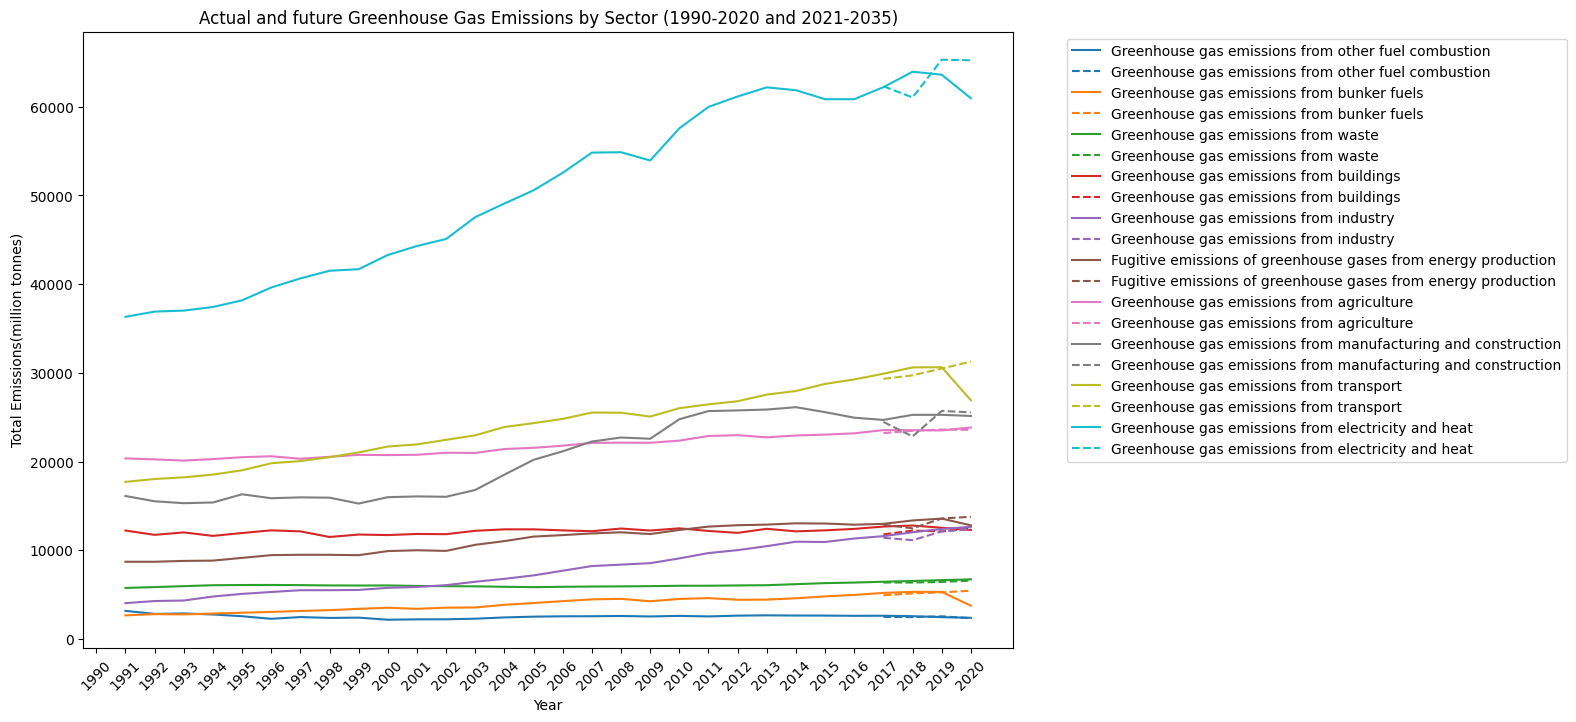

In [17]:
act_emissions = global_emissions[sectors][-5:-1]
result = y_predicted + act_emissions
result.index = result.index + 1

sector_colors = {
    'Greenhouse gas emissions from other fuel combustion': '#1f77b4',
    'Greenhouse gas emissions from bunker fuels': '#ff7f0e',
    'Greenhouse gas emissions from waste': '#2ca02c',
    'Greenhouse gas emissions from buildings': '#d62728',
    'Greenhouse gas emissions from industry': '#9467bd',
    'Fugitive emissions of greenhouse gases from energy production': '#8c564b',
    'Greenhouse gas emissions from agriculture': '#e377c2',
    'Greenhouse gas emissions from manufacturing and construction': '#7f7f7f',
    'Greenhouse gas emissions from transport': '#bcbd22',
    'Greenhouse gas emissions from electricity and heat': '#17becf'
}


plt.figure(figsize=(12, 8))
for sector in sectors:
    plt.plot(global_emissions.index, global_emissions[sector], label=sector, color=sector_colors[sector])
    plt.plot(result.index, result[sector], linestyle='--', label=sector, color=sector_colors[sector])

plt.xticks(all_years, rotation=45)
plt.title('Actual and future Greenhouse Gas Emissions by Sector (1990-2020 and 2021-2035)')
plt.xlabel('Year')
plt.ylabel('Total Emissions(million tonnes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
for i, column in enumerate(y_test.columns):
    mse = mean_squared_error(y_test.iloc[:, i], y_predicted[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test.iloc[:, i], y_predicted[:, i])

    print(f"Metrics for {column}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  Mean Absolute Error: {mae:.2f}")

Metrics for Greenhouse gas emissions from other fuel combustion_diff:
  Mean Squared Error: 9923.87
  Root Mean Squared Error: 99.62
  Mean Absolute Error: 94.45
Metrics for Greenhouse gas emissions from bunker fuels_diff:
  Mean Squared Error: 739945.63
  Root Mean Squared Error: 860.20
  Mean Absolute Error: 546.06
Metrics for Greenhouse gas emissions from waste_diff:
  Mean Squared Error: 25216.46
  Root Mean Squared Error: 158.80
  Mean Absolute Error: 152.62
Metrics for Greenhouse gas emissions from buildings_diff:
  Mean Squared Error: 323980.60
  Root Mean Squared Error: 569.19
  Mean Absolute Error: 502.94
Metrics for Greenhouse gas emissions from industry_diff:
  Mean Squared Error: 240209.56
  Root Mean Squared Error: 490.11
  Mean Absolute Error: 399.52
Metrics for Fugitive emissions of greenhouse gases from energy production_diff:
  Mean Squared Error: 430991.04
  Root Mean Squared Error: 656.50
  Mean Absolute Error: 489.48
Metrics for Greenhouse gas emissions from agricul